# References
## Hultborn and Pierrot-Deseilligny 1979
* Intracellular recording from one RC impaled with microelectrodes and injected with depolirizing step currents of constant, but varied strength.
* As seen in their Fig. 7, the pulse duration seem to be a bit less than 90 ms.
* The steady state is measured 80 ms after the onset of stimulation.

# Parameters adjusted
* $\alpha_n$ and $\beta_n$ were increased to make the dynamics of Kf fast. If it is fast enough, the channel would close before taking the membrane to zero. After that, Ks could be tuned to achieve the correct AHP and FxI characteristics.
* $\alpha_q$ and $\beta_q$ to approach the correct firing rate and adaptation.
* Kf and Ks conductances, in order to obtain an appropriate AHP.

# Considerations
* After Kf and Ks were closed, the passive properties would take the membrane to resting membrane potential, and therefore influence AHP duration.
* This parametrization had to be done in conjunction with the 2nd step.
* In the current strategy, decreasing $\alpha_q$ causes more adaptation, but changes AHP peak and duration. Adjusting Ks conductance and $\beta_q$ in order to get back a proper AHP will make the adaptation obtained disappear.
* The FxI curve was close to what is described in literature, but the adaptation period, which is known to be longer for higher currents, was always shorter.

In [4]:
import os, sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

from Configuration import Configuration
from InterneuronPoolOpt import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [5]:
def simulator(numberRC, duration, current, Parametrization, gkf, gks, aq, bq, an, bn):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    if Parametrization == 'old':
        # Parameters from java
        ## Threshold (makes a rheobase of 0.5 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0.1724138
        conf.confArray['f2'][idx] = 0.1724138
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
            
    elif Parametrization == 'new':
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
    
    elif Parametrization == 'final':
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.130
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.119
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.081
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = gkf
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = gks
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = bq
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = aq
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = an
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = bn
    
    pools = dict()
    pools[0] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    RC_mV = np.zeros_like(t)
    for i in xrange(0, len(t)):
        if t[i]>10 and t[i]<100:
            for j in xrange(len(pools[0].unit)):
                pools[0].iInjected[j] = current
        else:
            for j in xrange(len(pools[0].unit)):
                pools[0].iInjected[j] = 0
        #pools[1].atualizePool(t[i]) # RC synaptic Noise
        pools[0].atualizeInterneuronPool(t[i]) # RC pool
        RC_mV[i] = pools[0].v_mV[0]

    pools[0].listSpikes()
    
    intervals = 3
    FiringRate_pps = []
    if len(pools[0].poolSomaSpikes[:, 0]) != 0:
    # if the RC did fire
        for i in xrange(intervals):
            FiringRate_pps.append(1000/(pools[0].poolSomaSpikes[:, 0][i+1]-
                                           pools[0].poolSomaSpikes[:, 0][i])
                             )
    
        SteadyState = [x for x in pools[0].poolSomaSpikes[:, 0] if x>90]
        # For the case when small currents only generate fewer spikes
        if len(SteadyState) == 0:
            SteadyState.insert(0, pools[0].poolSomaSpikes[:, 0][-2])
            SteadyState.insert(1, pools[0].poolSomaSpikes[:, 0][-1])
        elif len(SteadyState) == 1:
            SteadyState.insert(0, pools[0].poolSomaSpikes[:, 0][-2])
        auxSteadyState = []
        for i in xrange(len(SteadyState)-1):
            auxSteadyState.append(1000/(SteadyState[i+1]-SteadyState[i]))
        FiringRate_pps.append(sum(auxSteadyState) / float(len(auxSteadyState)))

        #instFiring = 0
        #instFiring = np.zeros([1, len(pools[0].poolSomaSpikes[:, 0])-1], dtype=float)
        #factor = np.zeros_like(instFiring)
        #for i in xrange(1, len(pools[0].poolSomaSpikes[:, 0])):
        #    instFiring[0][i-1] = 2000/(pools[0].poolSomaSpikes[:, 0][i]-
        #                               pools[0].poolSomaSpikes[:, 0][i-1])
            
        #plt.figure()
        #plt.plot(instFiring[0], '.')
        #plt.show()
        
    else:
        FiringRate_pps = [0, 0, 0, 0]

    return FiringRate_pps, RC_mV, t

Interneuron Pool of RC ext built
All the 0 synapses were built
Synaptic Noise on RC_ext built
All the 1 synaptic noises were built
Interneuron Pool of RC ext built
All the 0 synapses were built
Synaptic Noise on RC_ext built
All the 1 synaptic noises were built
Interneuron Pool of RC ext built
All the 0 synapses were built
Synaptic Noise on RC_ext built
All the 1 synaptic noises were built
Interneuron Pool of RC ext built
All the 0 synapses were built
Synaptic Noise on RC_ext built
All the 1 synaptic noises were built
Interneuron Pool of RC ext built
All the 0 synapses were built
Synaptic Noise on RC_ext built
All the 1 synaptic noises were built
Interneuron Pool of RC ext built
All the 0 synapses were built
Synaptic Noise on RC_ext built
All the 1 synaptic noises were built
Interneuron Pool of RC ext built
All the 0 synapses were built
Synaptic Noise on RC_ext built
All the 1 synaptic noises were built
Interneuron Pool of RC ext built
All the 0 synapses were built
Synaptic Noise on RC

<IPython.core.display.Javascript object>


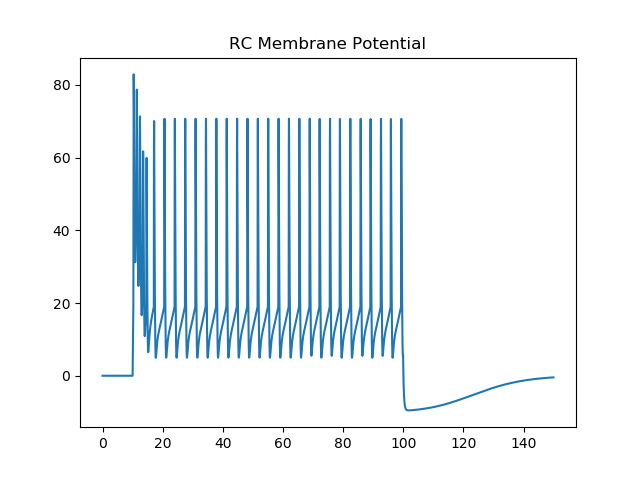

<IPython.core.display.Javascript object>


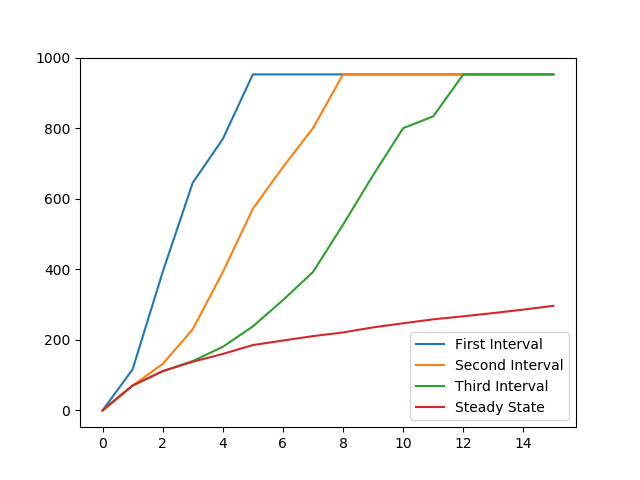

In [6]:
#sys.stdout = open(os.devnull, 'w')
nRC = 1
tsim = 150
params = 'final'
first = []
second = []
third = []
fourth = []
currents = [x/2.0 for x in range(0,31)]

gks = 2300000
gkf = 3300
aq = 0.004
bq = 0.02
an = 6
bn = 0.5

for i in xrange(16):#currents:
    FR, RCMembrane, t = simulator(nRC, tsim, i,params,gkf, gks,aq, bq, an, bn)
    first.append(FR[0])
    second.append(FR[1])
    third.append(FR[2])
    fourth.append(FR[3])
    
plt.figure()
plt.plot(t, RCMembrane)
plt.title('RC Membrane Potential')
plt.show()

plt.figure()
plt.plot(first, label='First Interval')
plt.plot(second, label='Second Interval')
plt.plot(third, label='Third Interval')
plt.plot(fourth, label='Steady State')
plt.legend()
plt.show()

#sys.stdout = sys.__stdout__